#<font color='red'> Lesson 4 - ASCII Files, Tables, Units, and Coordinates

**by Alejandro Benitez-Llambay (alejandro.benitezllambay@unimib.it)** for the lab "Esperimentazioni di Astrofisica" at UNIMIB



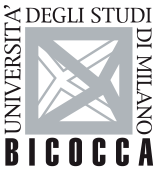

## <font color='red'> Tabular Data Files</font>

Tabular data files are plain text files used to store structured data in rows and columns. These files typically use delimiters to separate the data. Common formats include Comma-Separated Values (CSV), Tab-Separated Values (TSV), and others.

For example, a CSV file might look like this

```
1.0,10.2\n
2.0,12.2\n
3.0,9.2\n
4.0,2.2\n
```

Here, `\n` represents the line break, indicating the end of each line.

Similarly, a TSV file would look like this:

```
1.0\t10.2\n
2.0\t12.2\n
3.0\t9.2\n
4.0\t2.2\n
```

In this case, `\t` is the tab separator, which is interpreted as a tab space by plain text readers.

Although these text-based files are easy to visualize and edit in any basic text editor, they are more difficult to process compared to binary unstructured files.

Reading and interpreting the data as numerical values requires specialized functions. We will focus on using these functions without delving too deeply into the underlying details.

## <font color='red'> Reading Tabular Data Files </font>

In Python, there are several packages that can be used to read text-based tables. Some of them are:

* Numpy (`np.loadtxt('table.csv', delimiter=',')`)
* Pandas (`pd.read_csv('table.csv', header=[0,1])`)


While Numpy is particularly simple for tables that contain one single data type, `Pandas` is more flexible and has many more tools to deal with large tables and operations between tables (e.g., find cross-matches, etc).

The easiest way to load a simple table with either `NumPy` and `Pandas` is:

In [ ]:
# In Pandas, objects containing the table information are called DataFrames.
DataFrame = pd.read_csv('table.csv')

# In Numpy, tables are stored in NumPy Arrays:
Table = np.loadtxt('table.csv')

For text-based tables storing information in a less standarized format, one needs to rely on the Python built-in method to extract the data from the file. For example, to read a cvs table using built-in Python function, one would proceed as follows:

In [ ]:
# Open the CSV file
file = open("data.csv", "r")

# Read all lines into a list
lines = file.readlines()

# Close the file
file.close()

# Process each line (comma is the separator, as this is cvs file)
for line in lines:
    row = line.strip().split(",")  # Remove newline and split by comma
    print(row)  # Print each row as a list

## <font color='red'> Saving Tables </font>

If you have results that you want to save in a Table, this can be easily done with Pandas a follows:

In [ ]:
import pandas as pd
import numpy as np


x = np.array([x1, x2, ..., xn])
f_x = np.array([f(x1), f(x2), ..., f(xn)])

# Create a DataFrame with x and f(x)
df = pd.DataFrame({'x': x, 'f(x)': f_x})

# Write the DataFrame to a CSV file
df.to_csv('output.csv', index=False)

As you see, this requires to create a DataFrame Object.

You can also save a Table using build-in Python function, without the need of `Pandas`. One method that is sufficiently general to allow you do everything you might need is the following:

In [ ]:
# Suppose we have two numpy arrays, and we want to save them.
x = np.arange(100)
y = x**2

#Open the file
output_file = open('MyTable.csv', 'w')

#Write the header in the file
output_file.write('x,y\n')

#Loop over all elements of x and y:
for i in range(len(x)):

  # Write the values with the %f format, separated by a ,
  output_file.write('%f,%f\n'%(x[i], y[i]))

output_file.close()

Possible format specifiers for the string written in the files are:

In [ ]:
name = "Alice"
age = 30
pi = 3.141592653589793
number = 255

# Examples using the format specifiers
print("Name: %s" % name)      # Name: Alice (String)
print("Age: %d" % age)        # Age: 30 (Integer)
print("Pi: %f" % pi)          # Pi: 3.141593 (Float)
print("Scientific: %e" % pi)  # Scientific: 3.141593e+00 (Scientific Notation)

Name: Alice
Age: 30
Pi: 3.141593
Scientific: 3.141593e+00


If you prefer to use `NumPy` instead, you would do something like this:

In [ ]:
# A shorter version is using NumPy:

np.savetxt('MyTable.csv', np.array([x,y]).T, delimiter=',', header='x,y', comments='')

# <font color='red'> Application: The FAST All Sky HI Survey (FASHI) </font>

We are going to use a recent dataset released by the Fast All Sky HI survey collaboration (FASHI). This blind survey was designed to cover the entire sky observable by the Five-hundred-meter Aperture Spherical radio Telescope (FAST), spanning approximately 22000 square degrees of declination between $-14^o$
and $+66^o$, and in the frequency range of 1050-1450 Mhz. The data was collected between August 2020 and June 2023.

These tables contain approximately 35% of the sky observable by FAST.

If you are interested in more information about the survey, you can have a look at the original data release:

https://arxiv.org/pdf/2312.06097


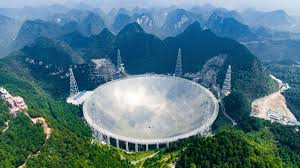

Download the FASHI dataset and upload it to your space:

FASHI CSV Table: https://drive.google.com/file/d/1KEgSPM69r3QU2GSoFT-7rkv9awVJfT_M/view?usp=sharing

In [ ]:
# Read the table using Pandas.
import pandas as pd

# Get the header information
header = pd.read_csv('/content/Table2-FASHI_extragalactic_HI_source_catalog.csv', nrows=1)

df = pd.read_csv('/content/Table2-FASHI_extragalactic_HI_source_catalog.csv', skiprows=2)
df.columns = header.columns

In [ ]:
# Display the first few rows of the Table
df.head()

,ID_FASHI,Name,ra,dec,ra-dec_err,cz,cz_err,cz_min,cz_max,v_radio,...,S_bf,S_bf_err,S_sum,S_sum_err,rms,SNR,distance,distance_err,log10Mass,log10Mass_err
0,20230000824,J073425.57-061135.2,113.6066,-6.1931,0.0019,10797.36,1.52,10569.21,10977.96,10422.00,...,2221.25,138.81,2150.54,138.81,2.87,24.98,143.68,7.18,10.02,0.05
1,20230000825,J110530.38-061111.6,166.3766,-6.1866,0.0015,7596.64,0.62,7513.62,7676.58,7408.90,...,1118.91,71.55,1098.33,71.55,2.41,31.90,108.32,5.42,9.48,0.05
2,20230042078,J111623.40-061056.9,169.0975,-6.1825,0.0052,24776.68,2.94,24469.20,24991.27,22885.30,...,648.51,147.58,568.00,147.58,2.81,9.38,327.57,16.38,10.18,0.11
3,20230000826,J072644.69-061053.7,111.6862,-6.1816,0.0043,19246.13,2.01,19002.04,19521.14,18085.10,...,474.51,62.99,504.00,62.99,1.18,11.25,253.69,12.68,9.83,0.07
4,20230042079,J110203.59-061042.3,165.5150,-6.1784,0.0037,9428.78,2.39,9235.63,9668.45,9141.28,...,1402.99,132.74,1201.04,132.74,2.65,13.22,134.61,6.73,9.76,0.06


In [ ]:
# Display the last few rows of the Table
df.tail()

,ID_FASHI,Name,ra,dec,ra-dec_err,cz,cz_err,cz_min,cz_max,v_radio,...,S_bf,S_bf_err,S_sum,S_sum_err,rms,SNR,distance,distance_err,log10Mass,log10Mass_err
41735,20230057430,J144309.93+651727.6,220.7914,65.2910,0.0025,10640.84,3.10,10410.54,10929.81,10276.10,...,2500.68,209.98,2107.48,209.98,3.83,19.35,143.60,7.18,10.07,0.06
41736,20230064306,J064236.98+651756.4,100.6541,65.2990,0.0031,4137.00,1.36,3974.94,4326.61,4080.69,...,1689.24,143.28,1451.90,143.28,3.14,15.41,54.33,2.72,9.06,0.06
41737,20230057439,J154605.84+651838.9,236.5243,65.3108,0.0038,11153.68,2.93,10900.93,11526.29,10753.60,...,644.16,84.50,542.12,84.50,1.40,12.68,149.74,7.49,9.52,0.07
41738,20230064308,J062538.84+651910.2,96.4118,65.3195,0.0012,6480.20,1.20,6167.04,6793.95,6343.09,...,3885.78,126.09,3885.80,126.09,2.06,41.70,92.68,4.63,9.89,0.05
41739,20230064309,J231825.50+651915.7,349.6063,65.3210,0.0043,20762.27,2.03,20642.11,20885.69,19417.50,...,560.07,64.75,588.11,64.75,1.83,11.18,279.38,13.97,9.98,0.07


In [ ]:
# Display the units:
for i in header.columns:
  print(i, header[i][0])

ID_FASHI nan
Name J2000
ra deg
dec deg
ra-dec_err deg
cz km/s
cz_err km/s
cz_min km/s
cz_max km/s
v_radio km/s
v_radio_err km/s
freq MHz
freq_err MHz
z nan
z_err nan
ell_maj arcmin
ell_min arcmin
ell_pa degree
W_50 km/s
W_50_err km/s
W_20 km/s
W_20_err km/s
F_peak mJy
F_peak_err mJy
S_bf mJy*km/s
S_bf_err mJy*km/s
S_sum mJy*km/s
S_sum_err mJy*km/s
rms mJy
SNR nan
distance Mpc
distance_err Mpc
log10Mass log10Msun
log10Mass_err  log10Msun


In [ ]:
# Columns can be retrieved as NumPy arrays using the value method associated with each column:
# For example, we can read the distance column as follows:

distance = df['distance'].values
print(type(distance))
print(distance[0:10])

<class 'numpy.ndarray'>
[143.68 108.32 327.57 253.69 134.61 143.94 151.95 196.07  24.48  26.41]


We can also read the Table Using `NumPy`, but `NumPy` is better suited for tables containing numeric data only. In this case, the table has a combination of text and numbers, so it will fail to read the entire table automatically. To fix this, we read the table as a string and then cast the data to the correct type later on when needed.

In [ ]:
# For example:
# Read the Header
header = np.loadtxt('/content/Table2-FASHI_extragalactic_HI_source_catalog.csv', delimiter=',', max_rows=1, dtype=str)

# Read the Units
units = np.loadtxt('/content/Table2-FASHI_extragalactic_HI_source_catalog.csv', delimiter=',', skiprows=1, max_rows=1, dtype=str)

# Read the Table
table  = np.loadtxt('/content/Table2-FASHI_extragalactic_HI_source_catalog.csv', delimiter=',', dtype=str, skiprows=2)

print(header)
print(units)
print(table)

['ID_FASHI' 'Name' 'ra' 'dec' 'ra-dec_err' 'cz' 'cz_err' 'cz_min' 'cz_max'
 'v_radio' 'v_radio_err' 'freq' 'freq_err' 'z' 'z_err' 'ell_maj' 'ell_min'
 'ell_pa' 'W_50' 'W_50_err' 'W_20' 'W_20_err' 'F_peak' 'F_peak_err' 'S_bf'
 'S_bf_err' 'S_sum' 'S_sum_err' 'rms' 'SNR' 'distance' 'distance_err'
 'log10Mass' 'log10Mass_err ']
['' 'J2000' 'deg' 'deg' 'deg' 'km/s' 'km/s' 'km/s' 'km/s' 'km/s' 'km/s'
 'MHz' 'MHz' '' '' 'arcmin' 'arcmin' 'degree' 'km/s' 'km/s' 'km/s' 'km/s'
 'mJy' 'mJy' 'mJy*km/s' 'mJy*km/s' 'mJy*km/s' 'mJy*km/s' 'mJy' '' 'Mpc'
 'Mpc' 'log10Msun' 'log10Msun']
[['20230000823' 'J110656.76-061135.4' '166.7365' ... '4.91' '9.42' '0.05']
 ['20230000824' 'J073425.57-061135.2' '113.6066' ... '7.18' '10.02'
  '0.05']
 ['20230000825' 'J110530.38-061111.6' '166.3766' ... '5.42' '9.48' '0.05']
 ...
 ['20230057439' 'J154605.84+651838.9' '236.5243' ... '7.49' '9.52' '0.07']
 ['20230064308' 'J062538.84+651910.2' '96.4118' ... '4.63' '9.89' '0.05']
 ['20230064309' 'J231825.50+651915.7' '349

## <font color='pink'> Exercise 1: Exploring a Real Astronomical Dataset </font>

1) Using the code provided above, read the FASHI table

2) FASHI tables report the measured distance of the detected radio source and its total HI mass. The distance is inferred from the redshift of the HI line, while the mass is determined from the flux using the following equation:

$M_{\rm HI} = \left ( 2.36\times 10^5 \ M_{\odot} \right ) \left ( \displaystyle\frac{S_{21}}{\rm Jy \ km \ s^{-1}} \right ) \left ( \displaystyle\frac{d}{\rm Mpc} \right )^2$

Using this relation, estimate the minimum flux detectable by FAST based on the mass-distance distribution of the sources.

3) Using the column `S_bf` of the table, compare the value obtained in (2).

An example solution is here: https://colab.research.google.com/drive/1eZjlF1XIahscHntc8o3m7n9uUNFI4diw?usp=sharing

Example Figures:

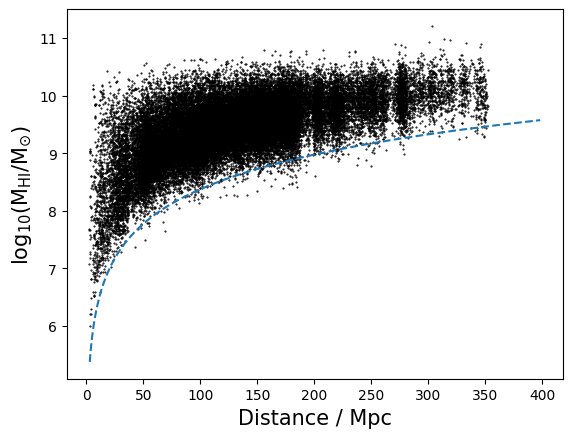

The relation between the flux derived from the quoted HI mass and the measured flux:

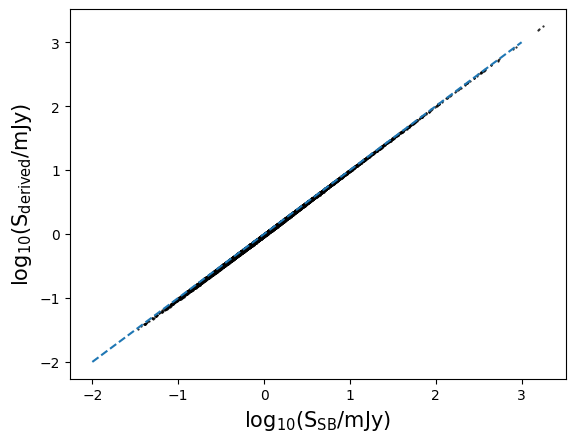

## <font color='pink'> Exercise 2: Loading  Bicocca's  Radio Telescope files: </font>

During the Radio Telescope lab, you will use text-based tables storing the data from the instrument. Prof. Gervasi already shared with you the details about the files' format. The format is a follows, and this explation should suffice to produce a function that reads the table:

The file name represents the time when the file was opened, in local time, and follows this format:  
**yearmonthday_hourminutesecond_URSP.txt** (e.g., `200404_101743_URSP.txt`).  

Each file is closed after approximately **5 minutes** of data collection, which corresponds to **150 records**.  

The **sampling time**—i.e., the interval between two consecutive records—is approximately **2 seconds**.  

Each record consists of several fields, separated by a **semicolon (";")**, and follows this format:  

1. **Time (in milliseconds)** – The time elapsed since the file was opened.  
2. **Frequency (in Hz)** – The frequency of the lowest frequency channel.  
3. **Frequency step (in Hz)** – The frequency difference between two consecutive channels, also known as the channel bandwidth.  
4. **Measurement (in dBm)** – The signal recorded by the receiver, channel by channel, repeated for **8192 channels**.  

### Example record:  
```
2181.000; 1300000000.000; 19531.250; -91.520; -92.976; ….
```

We provide a function for you. Make sure you understand what this does.

**Your TASKS**

1) Use the provided code to open the files needed for the Radio Telescope Lab.

2) Plot the measured signal as a function of frequency for different times.

3) Plot the signal for each frequency, averaged over the entire observation period.

An example Figure is shown below:

Example solution is here: https://colab.research.google.com/drive/1eZjlF1XIahscHntc8o3m7n9uUNFI4diw?usp=sharing

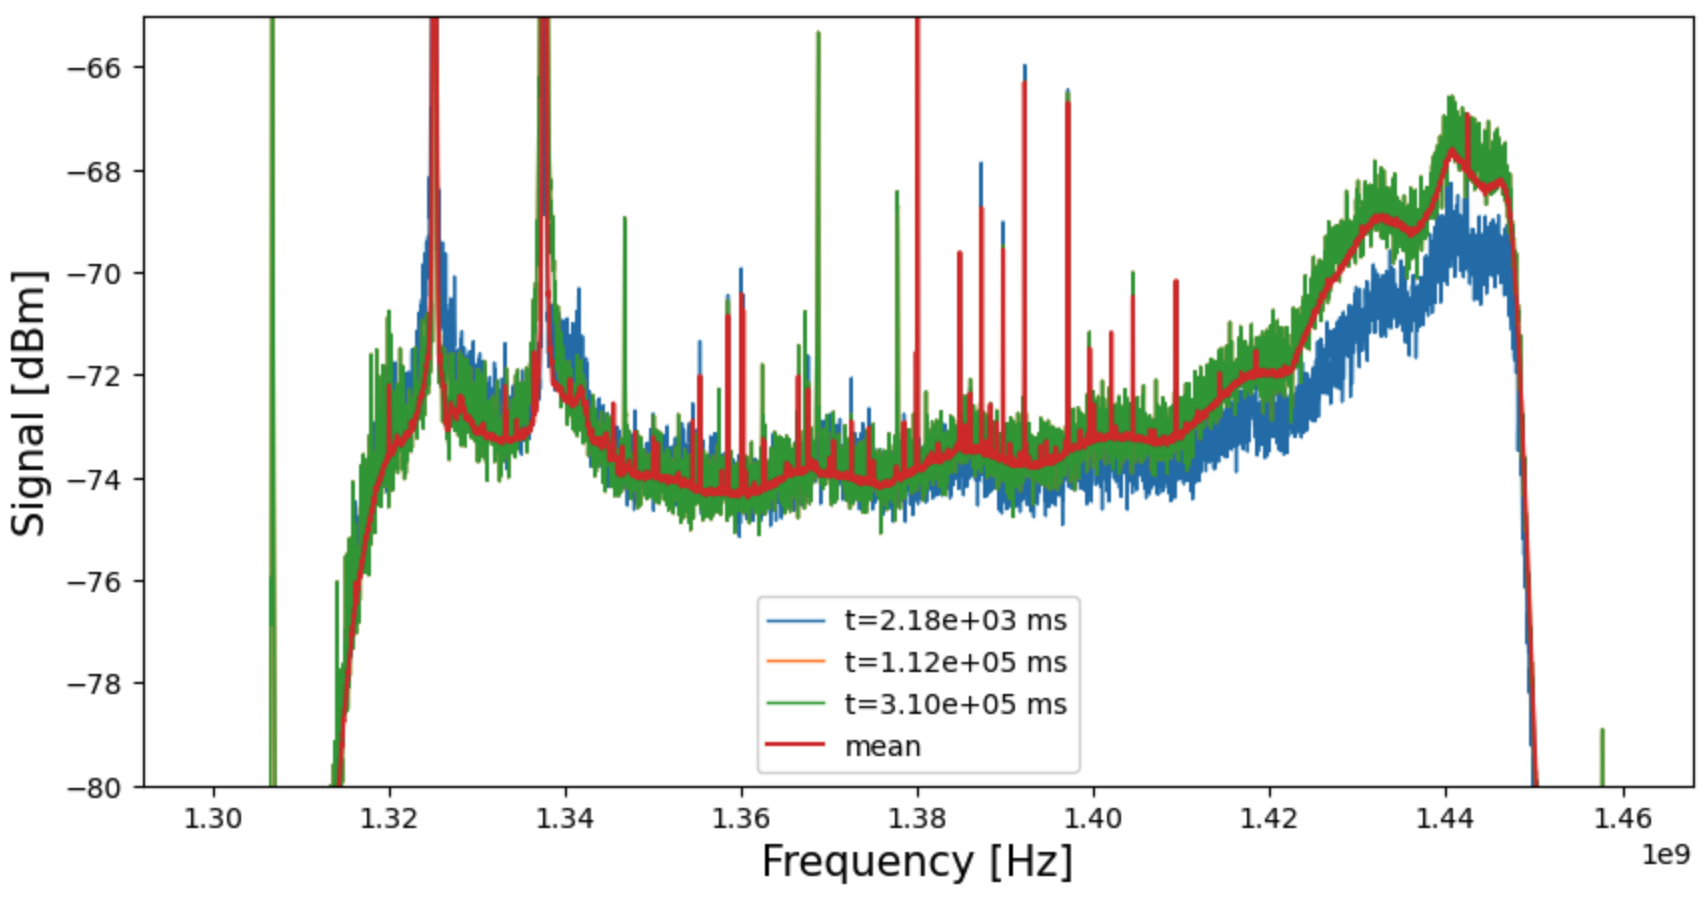

In [ ]:
import pandas as pd
import numpy as np

# Helper function to load the required data using Pandas.
def read_radiotelescope_file_pandas(inputfile):
    # Read the file into a Pandas DataFrame
    df = pd.read_csv(inputfile, sep=";", decimal=",", header=None)

    # Extract columns as NumPy arrays
    times = df.iloc[:, 0].to_numpy()
    nu0 = df.iloc[0, 1]  # Initial frequency (constant)
    dnu = df.iloc[0, 2]  # Frequency step size (constant)
    signal = df.iloc[:, 3:].to_numpy()  # Extract signal data

    # Compute frequency values
    nu = np.array([nu0 + dnu * i for i in range(signal.shape[1])])

    return times, nu, signal

In [ ]:
import numpy as np

# Helper function to load the required data using only Python build-in functions:
def read_radiotelescope_file(inputfile):
    """
    Reads a radiotelescope data file and extracts times, frequency values,
    and signal data.
    """

    # Open the file in read mode
    file = open(inputfile, 'r')

    # Read all lines from the file into a list
    lines = file.readlines()

    # Close the file to free resources
    file.close()

    # Initialize lists to store extracted data
    times = []   # Stores time values
    nu = []      # Stores frequency values (to be computed later)
    signal = []  # Stores signal data (multiple values per line)

    # Loop through each line in the file
    for line in lines:

        # Ignore empty lines (line breaks) in the file
        if line.strip() == "":
            continue  # Skip this iteration and move to the next line

        # Remove leading/trailing whitespace and split the line into values using `;` as a separator
        data = line.strip().split(";")

        # Convert values from string to float, replacing commas with decimal points
        float_values = [float(value.replace(",", ".")) for value in data]

        # Append the first value (time) to the `times` list
        times.append(float_values[0])

        # Extract frequency-related values
        nu0 = float_values[1]  # Initial frequency
        dnu = float_values[2]  # Frequency step size

        # Append the remaining values (signal data) to the `signal` list
        signal.append(float_values[3:])

    # Compute the frequency values for each channel
    # Frequency = initial frequency + (step size * index)
    nu = [nu0 + dnu * i for i in range(len(signal[0]))]

    # Return the extracted data as three lists
    return times, nu, signal

# Use the function as follows:
times, nu, signal = read_radiotelescope_file('200407_200701_USRP.txt')


## <font color='red'> Units with AstroPy </font>

Units must be treated with extra care. As you see from the previous exercise, a Table typically contains numerical values with diverse units, and it is not always straightforwar to keep track of all the units.

Errors introduced by incorrect propagation of units are very common, and we can all make these mistakes. This is why the Astronomical community has put some effort in developing packages to deal with units. One of such efforst is the `Units` Package implemented in `AstroPy`

https://docs.astropy.org/en/stable/units/index.html

If you struggle with Units, it is good practice to use this package.

In an nutshell, `astropy.units` handles defining, converting between, and performing arithmetic with physical quantities, such as meters, seconds, Hz, etc. It also handles logarithmic units such as magnitudes.

Astropy works with `Quantity` objects, which consist of an object with an associated `value` and `unit`.

`Quantity` objects are full `numpy` arrays, and they inherit all the properties of `numpy` arrays.

`Quantity` objects are created as follows:

In [ ]:
from astropy import units as u
import numpy as np

Distance = 1.0 * u.mpc
Distances_from_list = [1,2,3] * u.kpc
Distances_from_array = np.array([1,2,3]) * u.pc

print(Distance)
print(Distances_from_list)
print(Distances_from_array)

1.0 mpc
[1. 2. 3.] kpc
[1. 2. 3.] pc


The value and unit associated with a `Quantity` object can be retrieved with the value and unit methods:

In [ ]:
print(Distance.value, Distance.unit)
print(Distances_from_list.value, Distances_from_list.unit)
print(Distances_from_array, Distances_from_array.value, Distances_from_array.unit)

1.0 mpc
[1. 2. 3.] kpc
[1. 2. 3.] pc [1. 2. 3.] pc


Working with units is useful to avoid mistakes when combinining quantities with different units.

For example, suppose we need to dividie a distance expressed in km with another expressed in m, and obtain the result in cm. Without using units we should do something like this:

In [ ]:
Distance_in_km = 2
Distance_in_m  = 3
Distance_ratio_in_cm = (Distance_in_km * 1e5)/(Distance_in_m * 1e2)
print(Distance_ratio_in_cm)

666.6666666666666


However, using `Astropy.units` we could do:

In [ ]:
from astropy import units as u
Distance_in_km = 2 * u.km
Distance_in_m  = 3 * u.m
Distance_ratio = (Distance_in_km)/(Distance_in_m)
print(Distance_ratio)

0.6666666666666666 km / m


Which indicates that the result is given in km/m, which is formally correct. If we want the result to be in cm, we can simply convert the unit at the end:

In [ ]:
print(Distance_ratio.to(u.cm / u.cm))

666.6666666666666


## <font color='pink'> **Exercise 3: Converting Astronomical Distances** </font>
You are an astrophysicist analyzing the distances of galaxies. Your data contains distances in **megaparsecs (Mpc)**, but you need to:

1. Convert the distances to **light-years (ly)**.  
2. Convert them to **kilometers (km)**.  
3. Find out how long light takes to travel these distances in **years**.

Use **Astropy’s `units` module** to handle these conversions properly.

#### **Given Data:**
| Galaxy | Distance (Mpc) |
|--------|--------------|
| Andromeda | 0.78 |
| Triangulum | 0.86 |
| Whirlpool | 8.4 |
| Sombrero | 9.55 |

#### **Your Tasks:**
1. Convert the distances to **light-years**.
2. Convert the distances to **kilometers**.
3. Compute the **light travel time** (in years).
4. Print the results in a nicely formatted table.

---

### **Hints:**
- Use `astropy.units` (`u`) to attach units to values.
- Convert units using `.to(new_unit)`.

---

### **Expected Output Example (values may vary slightly)**
```
Galaxy       Distance (Mpc)  Distance (ly)       Distance (km)      Light Travel Time (years)
--------------------------------------------------------------------------------------------
Andromeda      0.78          2.54 million ly     2.40e+19 km        2.54 million years
Triangulum     0.86          2.81 million ly     2.66e+19 km        2.81 million years
Whirlpool      8.4           27.4 million ly     2.57e+20 km        27.4 million years
Sombrero       9.55          31.2 million ly     2.92e+20 km        31.2 million years
```

An example solution is here: https://colab.research.google.com/drive/1eZjlF1XIahscHntc8o3m7n9uUNFI4diw?usp=sharing

## <font color='red'> Astronomical coordinates </font>

Full documentation available at https://docs.astropy.org/en/stable/coordinates/index.html

The `astropy.coordinates` package provides classes for representing a variety of celestial/spatial coordinates and their velocity components, as well as tools for converting between common coordinate systems in a uniform way.

The most common way of working with Astronomical Coordinates is through the `SkyCoord` object.

In [ ]:
from astropy import units as u
from astropy.coordinates import SkyCoord

c = SkyCoord(ra=34*u.degree, dec=41*u.degree, frame='icrs')

As explained in the official documentation, `SkyCood` object can be instantiated in different ways. Some of these include:

In [ ]:
c = SkyCoord(10.625, 41.2, frame='icrs', unit='deg')
c = SkyCoord('00h42m30s', '+41d12m00s', frame='icrs')
c = SkyCoord('00h42.5m', '+41d12m')
c = SkyCoord('00 42 30 +41 12 00', unit=(u.hourangle, u.deg))
c = SkyCoord('00:42.5 +41:12', unit=(u.hourangle, u.deg))

Once we have a `SkyCoord` object we can access the components of that coordinate to get string representations of the full coordinate.

The component values are accessed using named attributes that depend on the coordinate frame. For the default, ICRS, the coordinate component names are `ra` and `dec`. For Galactic coordinates, these are called `l` and `b`. For example:

In [ ]:
from astropy import units as u
from astropy.coordinates import SkyCoord

c = SkyCoord(ra=34*u.degree, dec=41*u.degree, frame='icrs')

print(c.ra, c.dec)

34d00m00s 41d00m00s


The numeric value can be obatined with the `value` method:

In [ ]:
from astropy import units as u
from astropy.coordinates import SkyCoord

c = SkyCoord(ra=34*u.degree, dec=41*u.degree, frame='icrs')

print(c.ra.value, c.dec.value)

34.0 41.0


For the galactic coordinate system, we proceed a follows:

In [ ]:
from astropy import units as u
from astropy.coordinates import SkyCoord

c = SkyCoord(l=34*u.degree, b=41*u.degree, frame='galactic')

print(c.l.value, c.b.value)

34.0 41.0


## <font color='pink'> Exercise 4: Plotting and Transforming Astronomical Coordinates </font>

1) Using the same FASHI dataset loaded previously, plot the position of the objects in the sky (i.e., Declination vs Right Ascension, in degrees:

2) Plot the objects' declination in degrees vs right ascension in hours

3) Plot the coordinates of the Milky Way (i.e., a line with galactic latitude $b=0$)

An example solution is here: https://colab.research.google.com/drive/1eZjlF1XIahscHntc8o3m7n9uUNFI4diw?usp=sharing

An example Figure is shown below:

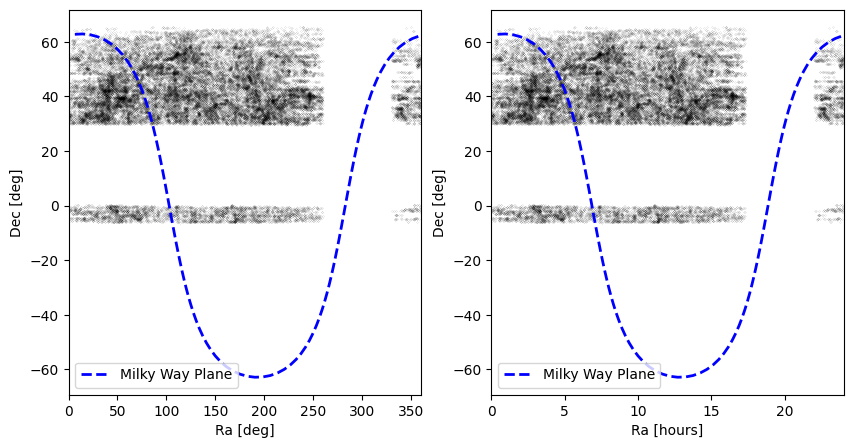